In [32]:
import os
import sys
home=os.path.expanduser("~")
sys.path.append(os.path.join(home, 'station2grid'))

import tools
from tools import options, datasets, knn_model, krg_model, plotMap, CommonObj
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
## temp
sns.set(font_scale=1)
ax = sns.catplot(
    x='ae_type', 
    y='value',
#     col='features',
#     hue='method', 
    data=df_mse,
    kind='box',
#     hue_order=hue_order,
#     order = ['pm2.5','pm2.5+F1','pm2.5+F2','pm2.5+F1+F2'],
    height=4,
    aspect=1.5,
    legend=True,
    legend_out=True,
)

ax.set_xticklabels(rotation=30)
ax.axes[0,0].set_xlabel('')
# ax.axes[0,0].set_ylim(0, 190)
# plt.legend(bbox_to_anchor=(1, 1))

In [3]:
air = pd.read_csv('/media/disk3/feynman52/station2grid/datasets/csv/csv_files/air.csv')

In [13]:
raw = air[air.dt=='2018-11-01 08:00:00']
raw.head()

,dt,lat,lon,pm25,pm10,temperature,humidity
22956059,2018-11-01 08:00:00,-6.883,107.672,46.5,0.0,22.125,100.0
22956060,2018-11-01 08:00:00,-6.231,106.826,25.0,27.0,32.870,60.0
22956061,2018-11-01 08:00:00,-6.168,106.789,109.0,116.0,30.870,65.0
22956062,2018-11-01 08:00:00,-6.138,106.827,55.0,71.0,33.500,58.0
22956063,2018-11-01 08:00:00,-6.128,106.788,14.0,14.5,30.000,59.5


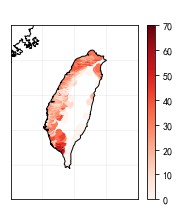

In [30]:
nrows, ncols = 1, 1
w, h = (9/5*ncols*1.7, 16/5*nrows)
fig, ax = plt.subplots(nrows, ncols, figsize=(w, h))

lats = raw.lat.values
lons = raw.lon.values
vals = raw.pm25.values
title = ' '

plotMap(
    ax,
    lats, lons, vals,
    title, title_size=18,
    latMin=21, latMax=26, lonMin=119, lonMax=123,
    bar_min=0, bar_max=70
)

In [23]:
optionS2GSD = options.OptionS2GSD(features='pm25', val_stations='Tainan')
dataS2G = datasets.DataS2G(optionS2GSD)
dataS2G.setup_test()

model = knn_model.KnnModel(dataS2G)

k = 3
weightKNN = 'distance'
x_train = raw[['lat','lon']].values
y_train = raw.pm25.values
grid = model.get_grid(k, weightKNN, x_train, y_train)

In [24]:
grid.shape

(1, 348, 204, 1)

In [26]:
model.coordinates.shape

(70992, 2)

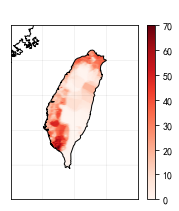

In [29]:
nrows, ncols = 1, 1
w, h = (9/5*ncols*1.7, 16/5*nrows)
fig, ax = plt.subplots(nrows, ncols, figsize=(w, h))

lats = model.coordinates[:, 0]
lons = model.coordinates[:, 1]
vals = grid.reshape(-1)
title = ' '

plotMap(
    ax,
    lats, lons, vals,
    title, title_size=18,
    latMin=21, latMax=26, lonMin=119, lonMax=123,
    bar_min=0, bar_max=70
)

In [33]:
info = CommonObj().epa_station_info
info.head()

,SiteName,SiteEngName,area,lat,lon,lat_round,lon_round,row,col
0,大霸尖山,Dabajianshan,mountain,24.461111,121.249722,24.46,121.25,88,125
1,牧山,Mushan,mountain,23.864722,121.152222,23.86,121.15,148,115
2,玉山,Yushan,mountain,23.470556,120.948889,23.47,120.95,187,95
3,北大武山,Beidawushan,mountain,22.629167,120.751944,22.63,120.75,271,75
4,陽明,Yangming,city,25.182722,121.529583,25.18,121.53,16,153


In [35]:
x = grid[:, info.row, info.col, :]
x.shape

(1, 77, 1)

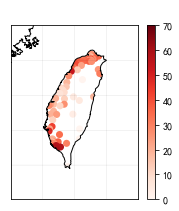

In [36]:
nrows, ncols = 1, 1
w, h = (9/5*ncols*1.7, 16/5*nrows)
fig, ax = plt.subplots(nrows, ncols, figsize=(w, h))

lats = info.lat.values
lons = info.lon.values
vals = x.reshape(-1)
title = ' '

plotMap(
    ax,
    lats, lons, vals,
    title, title_size=18,
    latMin=21, latMax=26, lonMin=119, lonMax=123,
    bar_min=0, bar_max=70
)